In [2]:
import time
from pprint import pprint
import ccxt
import ta
import pandas as pd
import numpy as np
import schedule
import time
import datetime

Useful links

- https://github.com/ccxt/ccxt

In [3]:
import ccxt
import pandas as pd
import numpy as np

In [4]:
timestamps = [1609459200000,
             1612137600000,
             1614556800000,
             1617235200000,
             1619827200000,
             1622505600000,
             1625097600000,
             1627776000000,
             1630454400000,
             1633046400000,
             1635724800000,
             1638316800000]



exchange = ccxt.bittrex()

cols = ['timestamp', 'open', 'high', 'low', 'close', 'vol']
dfs = []

for timestamp in timestamps:
    #gets the data from the start of the month
    d = exchange.fetch_ohlcv('ETH/USDT', timeframe='1h',
                         since = timestamp)
    
    #puts the data in a usable format and changes column names
    df = pd.DataFrame(data =d, columns = cols)
    
    #converts the date column into something we can understand
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    #put all the small dataframes for each month in a list
    dfs.append(df)

In [5]:
#combine the monthly dataframes into one big one
eth_1h = pd.concat(dfs).reset_index(drop=True)

In [6]:
eth_1h

,timestamp,open,high,low,close,vol
0,2021-01-01 00:00:00,737.999995,738.493282,730.000000,735.024762,68.660671
1,2021-01-01 01:00:00,734.345840,748.561401,734.345840,748.000000,168.698874
2,2021-01-01 02:00:00,747.861956,748.992147,742.920000,745.316243,135.572572
3,2021-01-01 03:00:00,744.816002,747.658423,743.800000,745.301692,173.561005
4,2021-01-01 04:00:00,745.952744,747.382529,740.176450,743.050501,66.603023
...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,3701.358048,3701.358048,3622.896088,3627.671703,22.178103
8756,2021-12-31 20:00:00,3624.677826,3661.967276,3623.852969,3644.261364,8.454489
8757,2021-12-31 21:00:00,3646.521801,3697.965890,3635.388800,3688.486856,33.498243
8758,2021-12-31 22:00:00,3685.677057,3710.644070,3676.297758,3683.106297,22.730084


In [7]:
'''
Other time frames
            'timeframes': {
                '1m': 'MINUTE_1',
                '5m': 'MINUTE_5',
                '1h': 'HOUR_1',
                '1d': 'DAY_1',
            },
'''

"\nOther time frames\n            'timeframes': {\n                '1m': 'MINUTE_1',\n                '5m': 'MINUTE_5',\n                '1h': 'HOUR_1',\n                '1d': 'DAY_1',\n            },\n"

#### some playing around I did 

In [8]:
df = eth_1h.iloc[2800:3500]

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Candlestick(x=df['timestamp'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close']), secondary_y = True)

fig.add_trace(go.Bar(x=df['timestamp'], y=df['vol'], opacity=1),
               secondary_y=False)

fig.layout.yaxis2.showgrid=False
fig.show()

In [10]:
np.abs(eth_1h['close'] - eth_1h['open']).argmax()

3167

In [11]:
eth_1h.iloc[3167]

timestamp    2021-05-12 23:00:00
open                 4215.265306
high                 4233.061224
low                       3705.0
close                     3810.0
vol                  1359.601017
Name: 3167, dtype: object

<AxesSubplot:>

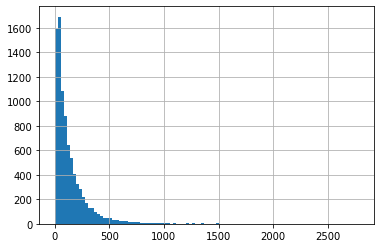

In [12]:
eth_1h['vol'].hist(bins=100)

In [13]:
eth_1h.head()

,timestamp,open,high,low,close,vol
0,2021-01-01 00:00:00,737.999995,738.493282,730.00000,735.024762,68.660671
1,2021-01-01 01:00:00,734.345840,748.561401,734.34584,748.000000,168.698874
2,2021-01-01 02:00:00,747.861956,748.992147,742.92000,745.316243,135.572572
3,2021-01-01 03:00:00,744.816002,747.658423,743.80000,745.301692,173.561005
4,2021-01-01 04:00:00,745.952744,747.382529,740.17645,743.050501,66.603023


In [14]:
eth_1h.groupby(['month']).describe()

KeyError: 'month'

In [15]:
eth_1h['hour'] = eth_1h.timestamp.dt.hour

In [ ]:
eth_1h[eth_1h['vol'] > eth_1h['vol'].quantile(.99)].groupby('hour')['vol'].mean()

In [ ]:
eth_1h['month'] = eth_1h['timestamp'].dt.month

In [ ]:
eth_1h.groupby('month')['vol'].mean()

In [ ]:
eth_1h.query("month == 9")

In [ ]:
eth_1h.groupby(['month','hour']).std().sort_values(by=['close'], ascending=False)

In [ ]:
eth_1h['close'].corr(eth_1h['close'].shift(1000))